## HW9: Plotting bias, variance and decision trees

In this problem, we'll investigate the bias and the variance of two different estimators. We'll see (once again) that fitting the data more precisely is not always a good idea.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, randn, choice
np.random.seed(4741)

### a)

Suppose we have a sinusoid function $f(x)=10\sin(x)$. Our dataset $\mathcal D$ will consist of $n=7$ data points drawn from the following probabilistic model. For each data point $x_i$ we randomly draw uniformly in $[0,6]$ and observe a noisy $y_i=f(x_i)+\epsilon_i$, where $\epsilon_i$ is some noise drawn from a standard normal distribution $\mathcal N(0,1)$.

Generate a sample dataset from this distribution. Plot this dataset $\mathcal D$ and the true function $f(x)$.

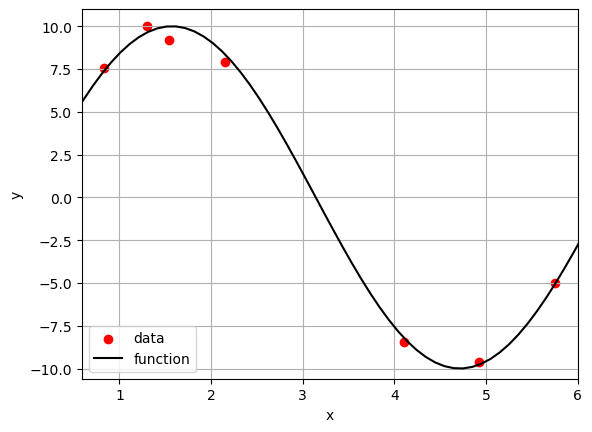

In [112]:
'''using code from Bootstrap.ipynb provided in class'''

# Generate and plot data
n = 7

# define function
def g(x): return 10*np.sin(x)

# definse noise
noise = np.random.randn(n)

# np.random.seed(6)
def sample_data(num_points):
    x = np.random.uniform(0,6,num_points)
    y = g(x) + np.random.randn(n)
    return x,y

x,y = sample_data(n)

def plotdata(x=x,y=y, margin=.05, col = 'r'):
    plt.scatter(x,y, label="data", color = col)
    plt.xlabel("x") 
    plt.ylabel("y")     
    range_y = np.max(y) - np.min(y)
    range_x = np.max(x) - np.min(x)
    plt.ylim([np.min(y)-margin*range_y,np.max(y)+margin*range_y])
    plt.xlim([np.min(x)-margin*range_x,np.max(x)+margin*range_x])

def plotfunc(f, xmin=-100,xmax=100,nsamples=100,label="", col='k'):
    x = np.linspace(xmin, xmax, nsamples)
    y = f(x)
    plt.plot(x, y, color=col, label=label)
    plt.grid()
    
dx = np.arange(0, 6, 0.01)
plotdata(x=x,y=y)
plotfunc(g, xmin=0, xmax=10)
plt.legend(['data', 'function'], loc = 'lower left')
plt.show()

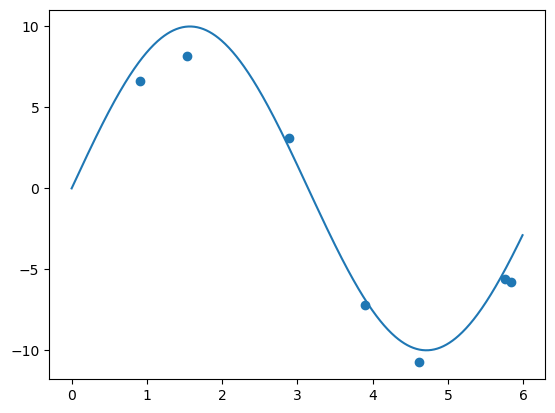

In [99]:
n=7

Dx = np.random.uniform(0, 6,n)
noise = np.random.randn(n)

f = lambda x: 10*np.sin(x)

Dy= np.array([f(Dx[i])+noise[i] for i in range(n)])

plt.scatter(Dx,Dy)
dx = np.arange(0, 6, 0.01)
plt.plot(dx, f(dx))

### b)

Fit a linear model $l(x)=w_0+w_1x$ to $\mathcal D$.
Plot this linear model $l(x)$ together with $\mathcal D$ and $f(x)$.

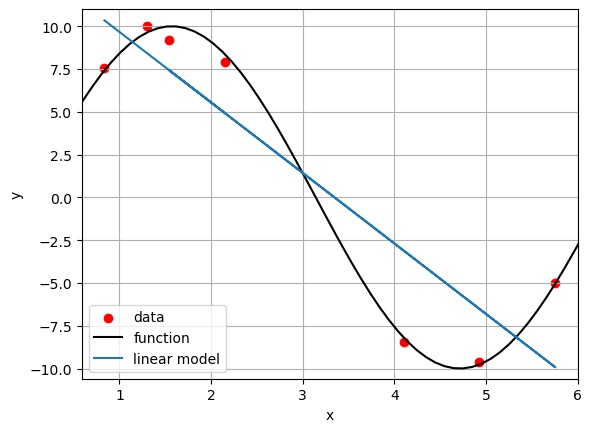

In [113]:
#append offset
X = np.asarray([x, np.ones(len(x))]).T

# fit linear model
w = np.linalg.lstsq(X, y, rcond=None)[0]

plotdata(x=x,y=y)
plotfunc(g, xmin=0, xmax=10)
plt.plot(x, np.dot(X,w))
plt.legend(['data', 'function', 'linear model'], loc = 'lower left')

### c)

Fit a cubic model $c(x)=w_0+w_1x+w_2x^2+w_3x^3$ to $\mathcal D$.
Plot this cubic model $c(x)$ together with $\mathcal D$ and $f(x)$.

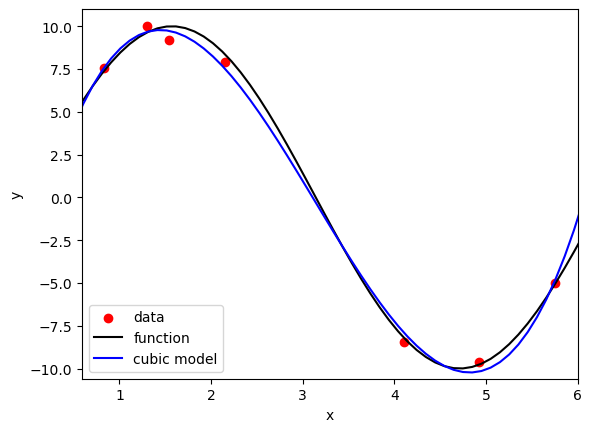

In [115]:
#fit cubic regression model
model = np.poly1d(np.polyfit(x, y, 3))

plotdata(x=x,y=y)
plotfunc(g, xmin=0, xmax=10)
plotfunc(model, xmin=0, xmax=10, col='b')
plt.legend(['data', 'function', 'cubic model'], loc = 'lower left')

### d)

Repeat parts b) and c) for 1000 different randomly drawn sets $\mathcal D$.

Average the 1000 linear models you generated to get the average linear model $\bar{l}(x)$. Plot $\bar{l}(x)$ with $f(x)$.

Generate the average cubic model $\bar{c}(x)$ in the same way, and plot it together with $f(x)$.

In [122]:
w_avg = np.asarray([0.0,0.0])
model_avg = np.poly1d([0,0,0]) 
for i in range(1,1001):
    '''generate data'''
    n = 7
    def sample_data(num_points):
        x = np.random.uniform(0,6,num_points)
        y = g(x) + np.random.randn(n)
        return x,y
    x,y = sample_data(n)

    '''linear model'''
    # append offset
    X = np.asarray([x, np.ones(len(x))]).T
    # fit linear model
    w_avg += np.linalg.lstsq(X, y, rcond=None)[0]

    '''cubic model'''
    #fit cubic regression model
    model_avg += np.poly1d(np.polyfit(x, y, 3))  

w_avg /= 1000
model_avg /= 1000

print(model)
print(model_avg)

       3         2
1.038 x - 9.753 x + 21.67 x - 4.305
        3         2
0.9864 x - 9.414 x + 20.74 x - 2.829


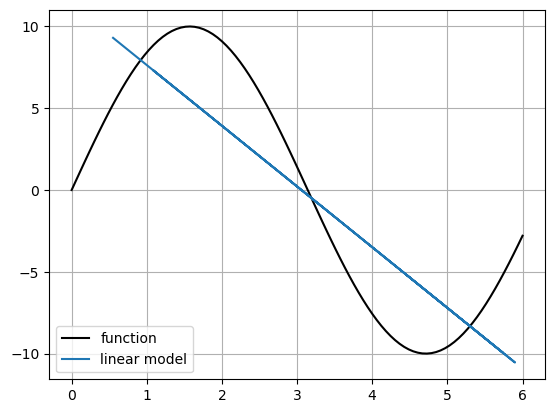

In [125]:
'''plot linear model & function'''
plotfunc(g, xmin=0, xmax=6)
plt.plot(x, np.dot(X,w_avg))
plt.legend(['function', 'linear model'], loc = 'lower left')

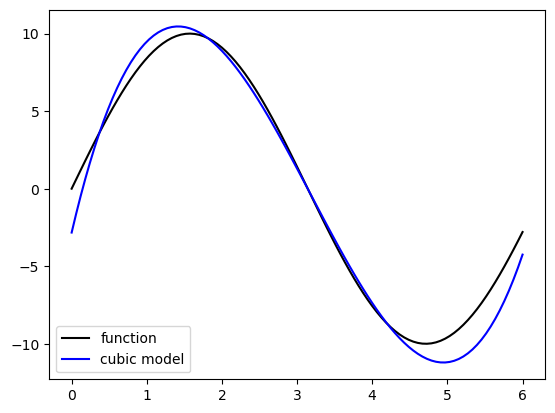

In [124]:
'''plot cubic model & function'''
plotfunc(g, xmin=0, xmax=6)
plotfunc(model_avg, xmin=0, xmax=6, col='b')
plt.legend(['function', 'cubic model'], loc = 'lower left')

### e)

Describe the squared bias graphically with respect to the two plots in part d). Compute the squared bias of $\bar{l}(x)$ and $\bar{c}(x)$. Which model has smaller squared bias?

In [2]:
import scipy.integrate as integrate

integrate.quad(squared_bias, 0, 6, args=(f, l_bar))
'''The linear model has a higher squared bias because of its simpler model complexity and higher prediction error'''

### f)

Compute the variance of $\bar{l}(x)$ and $\bar{c}(x)$. Which model has smaller variance? How do you interpret this? Which model has smaller overall error?

### g)

How do you think your results would depend on the number of points in the data set $\mathcal D$? Feel free to perform an experiment to check. How many points would you need before the opposite model (from your answer in the previous question) has smaller overall error?

### h)
We can also investigate the bias-variance tradeoff for trees.

Suppose our dataset $\mathcal D$ consists of $n=10$ data points drawn randomly from two moons and is balanced. Points are labeled 1 in one moon and 0 in the other moon. We set 0.05 to be the standard deviation of Gaussian noise in the data.

Generate a sample dataset using random_state=2, and plot it. (Note: because the data is 2-dimensional, have the x- and y-coordinates on the axes and represent the label with the color blue for 1 and red for 0.)

In [ ]:
from sklearn.datasets import make_moons

###YOUR CODES###

Fit a decision tree model with 2 splits to $\mathcal D$. Use random_state= 2. (Hint: for n splits, there are at most n+1 leaf nodes.)

Plot this tree in the form of rectangular partitions of the feature space with $\mathcal D$. Use lines to mark the splits, and shade the regions with the correct label color.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

###YOUR CODES###

### i)

Repeat part h) to fit models for 1000 different randomly drawn sets $\mathcal D$ from a newly generated set of 10,000 points using random_state=2. Average the individual 2-split decision trees to get the "average" 2-split decision tree model $\bar{t}(x)$ using the bagging ensemble method learned in class. Plot $\bar{t}(x)$ for all 10,000 points.

In [ ]:
from sklearn.ensemble import BaggingClassifier

###YOUR CODES###